In [10]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop("CustomerID",inplace=True,axis=1)

In [6]:
df.isna().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.shape

(200, 4)

In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df["Gender"] = le.fit_transform(df.Gender)

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


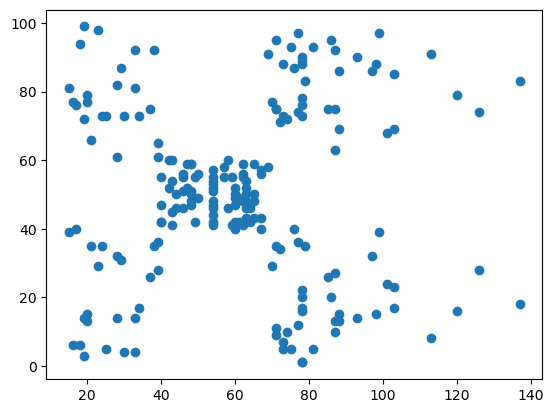

In [16]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

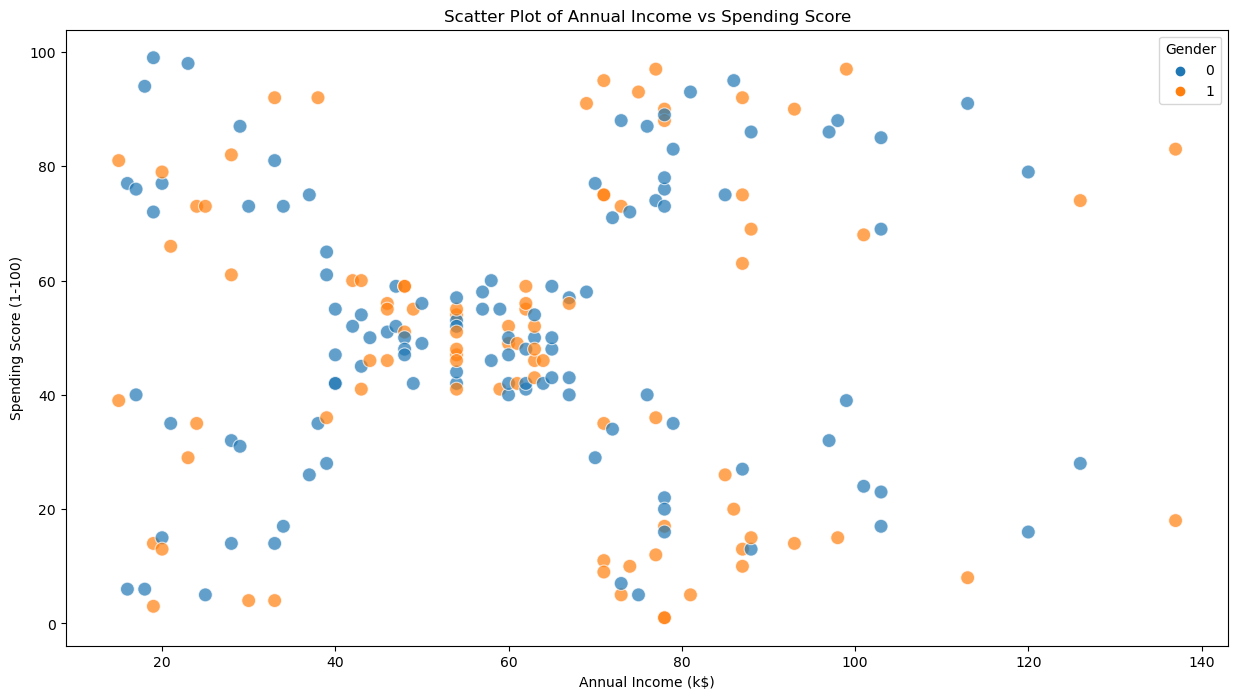

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, s=100, alpha=0.7)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()

In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

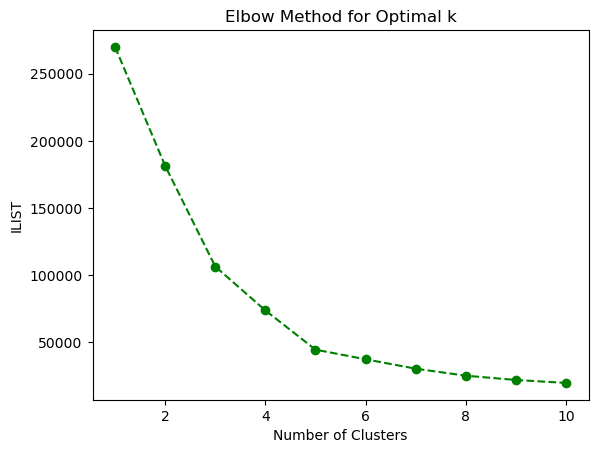

In [20]:
ilist = []  # Within-Cluster-Sum-of-Squares
    
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), ilist,marker='o', linestyle='--', color='g')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('ILIST')  # Within-Cluster-Sum-of-Squares
plt.show()

In [21]:
# Training the K-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [22]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train_scaled)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, n_init=10, random_state=42)

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [24]:
kmeans.inertia_

22.701835704110238

In [25]:
y_means=kmeans.fit_predict(X)


E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


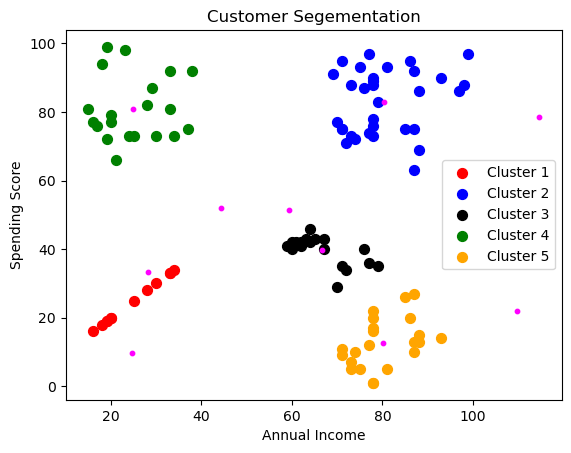

In [26]:
plt.scatter(X.iloc[y_means==0,0], X.iloc[y_means==0,0], s = 50,c = 'red', label="Cluster 1" )
plt.scatter(X.iloc[y_means==1,0], X.iloc[y_means==1,1], s = 50,c = 'blue', label="Cluster 2" )
plt.scatter(X.iloc[y_means==2,0], X.iloc[y_means==2,1], s = 50,c = 'black', label="Cluster 3" )
plt.scatter(X.iloc[y_means==3,0], X.iloc[y_means==3,1], s = 50,c = 'green', label="Cluster 4" )
plt.scatter(X.iloc[y_means==4,0], X.iloc[y_means==4,1], s = 50,c = 'orange', label="Cluster 5" )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10,c= "magenta")
plt.title("Customer Segementation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

In [27]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[[ 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


In [28]:
inertia_scores2=[]
for i in range(1,11) :
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [29]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,86.538462,82.128205


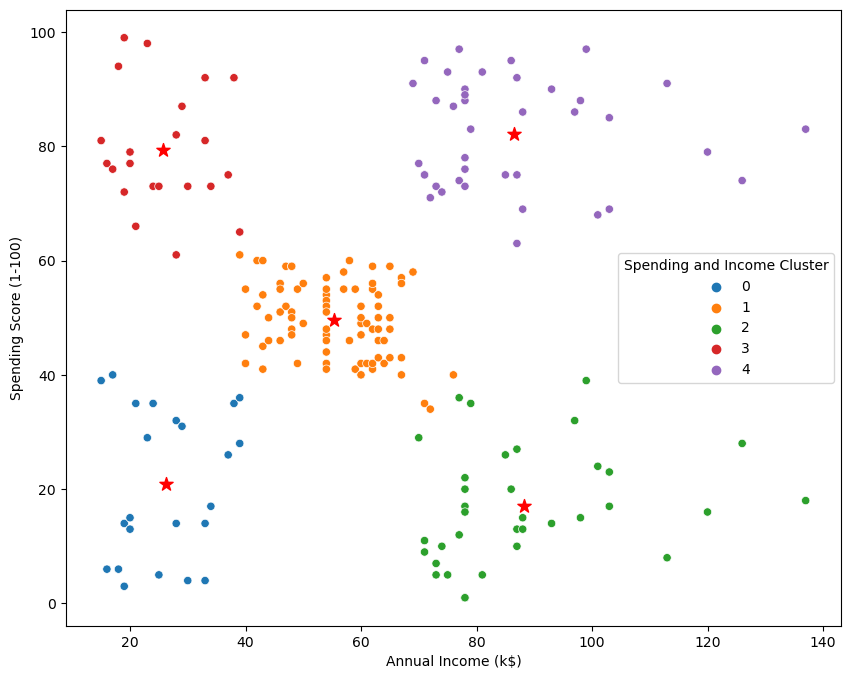

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='r',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster',palette ="tab10");